In [1]:
import urllib.request
import json

In [2]:
url = 'http://localhost:3000/analytics'
req = urllib.request.Request(url)

In [3]:
r = urllib.request.urlopen(req).read()
cont = json.loads(r.decode('utf-8'))

In [4]:
cont['delayed_per_hour']

{'16': 4, '17': 115}

In [5]:
import pandas as pd

analytics = pd.read_json(path_or_buf=url,numpy=True)
analytics

,delayed_per_hour,tot_per_hour
16,4,4
17,115,1913


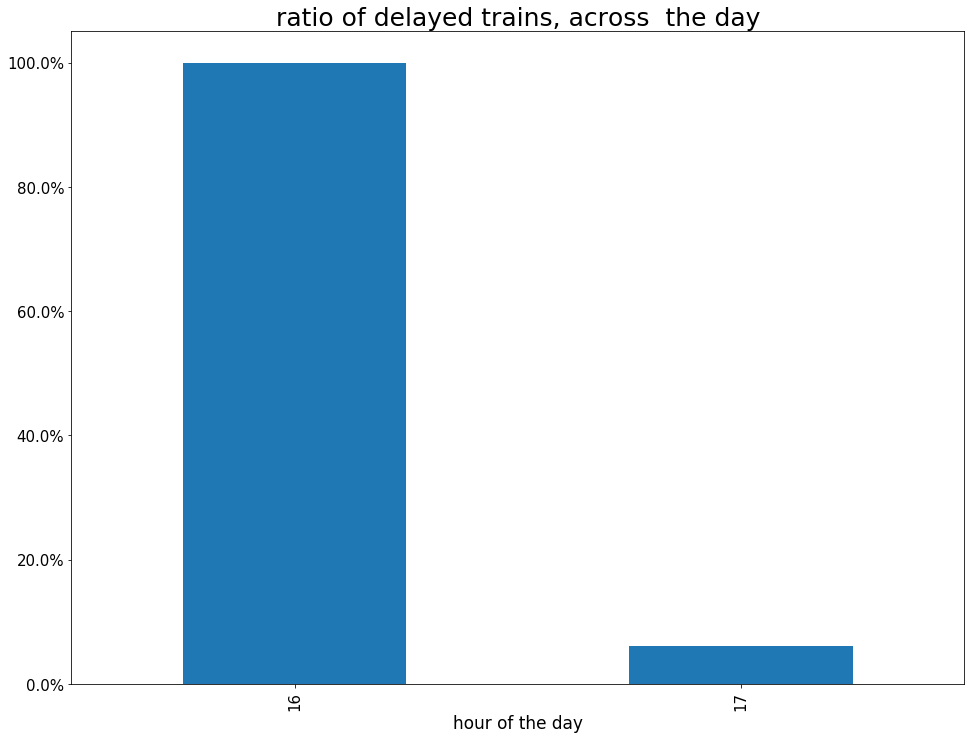

In [6]:
import numpy as np
import pandas as pd
import datetime
from itertools import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
from matplotlib import mlab
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
%matplotlib inline

def to_percent(y, position):
    s = str(100 * y)
    return s + '%'
    
formatter_percent = FuncFormatter(to_percent)

plot_delay_dist = (analytics.delayed_per_hour/analytics.tot_per_hour).plot(kind='bar', figsize=(16,12))
plot_delay_dist.set_xlabel("hour of the day", fontsize=17)
plot_delay_dist.set_title('ratio of delayed trains, across  the day', fontsize=25)
plot_delay_dist.tick_params(axis='both', which='major', labelsize=15)
plot_delay_dist.yaxis.set_major_formatter(formatter_percent)